In [2]:
pip install tensorflow keras opencv-python matplotlib

  Using cached tensorflow-2.19.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl.metadata (20 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.0.1-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.71.0-cp312-cp312-macosx_10_14_universal2.whl.metadata (3.8 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-ma

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
Prediction: REAL (0.54)


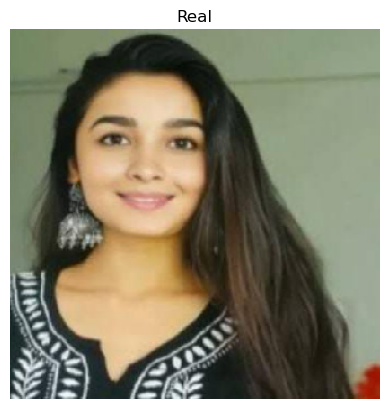

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input

# Load base model
base_model = Xception(weights='imagenet', include_top=False)

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # 1 for binary classification

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Load pretrained weights (optional – skip this if you want to train your own)
# model.load_weights('your_trained_weights.h5')  # <-- if you have trained weights
def detect_deepfake(image_path, model):
    img = image.load_img(image_path, target_size=(299, 299))  # Xception input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)[0][0]

    if prediction > 0.5:
        print(f"Prediction: FAKE ({prediction:.2f})")
    else:
        print(f"Prediction: REAL ({1 - prediction:.2f})")

    # Optional: show image
    plt.imshow(img)
    plt.title("Deepfake" if prediction > 0.5 else "Real")
    plt.axis('off')
    plt.show()
    # Example
detect_deepfake("Sample_img2.jpg",model)